<a href="https://colab.research.google.com/github/hugoplm/santander-coders/blob/master/5_Exercicio_DeepLearning_MNIST/DL_MNIST_Modelo2_Hugo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregando os Dados

Informações do Dataset

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images


- Returns

Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).


In [18]:
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [19]:
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = keras.datasets.fashion_mnist.load_data()

In [20]:
print("X_train: ", X_train_raw.shape)
print("y_train: ", y_train_raw.shape)
print("X_test:  ", X_test_raw.shape)
print("y_test:  ", y_test_raw.shape)

X_train:  (60000, 28, 28)
y_train:  (60000,)
X_test:   (10000, 28, 28)
y_test:   (10000,)


In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

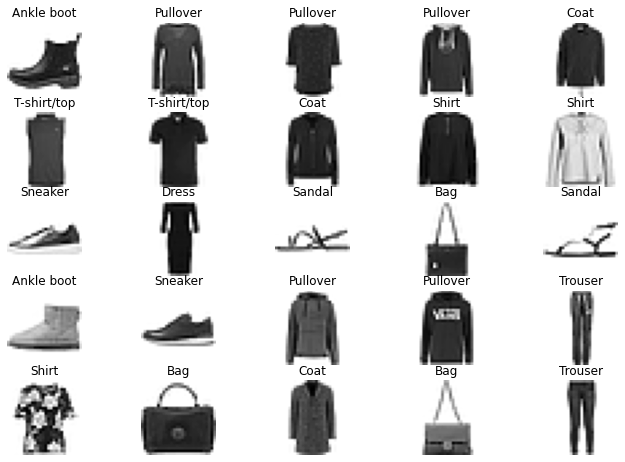

In [22]:
f, ax = plt.subplots(5,5)
f.subplots_adjust(0,0,1.5,1.5)
for i in range(0,5,1):
  for j in range(0,5,1):
    rnd_number = randint(0,len(X_train_raw))
    ax[i,j].imshow(X_train_raw[rnd_number], cmap=plt.cm.binary)
    ax[i,j].set_title(class_names[y_train_raw[rnd_number]])
    ax[i,j].axis('off')

# Pré-processamento dos Dados

In [23]:
X_train, X_val, y_train, y_val = train_test_split(
     X_train_raw, y_train_raw, stratify=y_train_raw, test_size=0.33, random_state=42)

In [24]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1,1)).toarray()
y_val = hot.transform(y_val.reshape(-1,1)).toarray()

In [25]:
X_train = X_train / 255
X_val = X_val / 255

In [26]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(40200, 28, 28)
(19800, 28, 28)
(40200, 10)
(19800, 10)


Distribuição das Classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


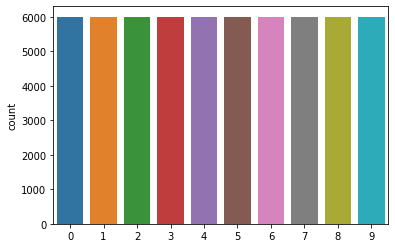

In [27]:
import seaborn as sns
sns.countplot(y_train_raw);

#Modelo Deep Learning

## Carregando as Bibliotecas

In [28]:
from tensorflow.python.keras.layers import Input, Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Modelo 2

Maior quantidade de camadas (mantendo a quantidade de neurônios)

### Definição da Arquitetura

In [29]:
rede = Sequential()

rede.add(Flatten())
rede.add(Dense(25,  input_dim = X_train.shape[1]*X_train.shape[2]))
rede.add(Activation('relu'))
rede.add(Dense(25))
rede.add(Activation('relu'))
rede.add(Dense(25))
rede.add(Activation('relu'))
rede.add(Dense(25))
rede.add(Activation('relu'))
rede.add(Dense(25))
rede.add(Activation('relu'))
rede.add(Dense(10))
rede.add(Activation('softmax'))

In [30]:
es = EarlyStopping(monitor = 'val_loss', 
                   min_delta = 0.001, 
                   patience = 10, 
                   verbose = 1, 
                   mode = 'auto')

In [31]:
rede.compile(loss = 'categorical_crossentropy', 
              optimizer = 'Adam', 
              metrics=['accuracy'])

### Treinamento do Modelo

In [32]:
hist = rede.fit(X_train, 
                y_train, 
                epochs = 50,
                batch_size=50,
                verbose = 1,
                validation_data = (X_val, y_val),
                callbacks = [es])

Epoch 1/50
804/804 [==============================] - 4s 4ms/step - loss: 0.7406 - accuracy: 0.7306 - val_loss: 0.5368 - val_accuracy: 0.8098
Epoch 2/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4669 - accuracy: 0.8323 - val_loss: 0.4315 - val_accuracy: 0.8435
Epoch 3/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4204 - accuracy: 0.8471 - val_loss: 0.3944 - val_accuracy: 0.8584
Epoch 4/50
804/804 [==============================] - 3s 4ms/step - loss: 0.3894 - accuracy: 0.8572 - val_loss: 0.3736 - val_accuracy: 0.8668
Epoch 5/50
804/804 [==============================] - 3s 4ms/step - loss: 0.3722 - accuracy: 0.8626 - val_loss: 0.3718 - val_accuracy: 0.8662
Epoch 6/50
804/804 [==============================] - 3s 4ms/step - loss: 0.3589 - accuracy: 0.8668 - val_loss: 0.3584 - val_accuracy: 0.8719
Epoch 7/50
804/804 [==============================] - 3s 4ms/step - loss: 0.3497 - accuracy: 0.8713 - val_loss: 0.3661 - val_accuracy: 0.8682
Epoch 

### Avaliação do Modelo

In [33]:
pred = rede.predict(X_val)

print(accuracy_score(y_val.argmax(1), pred.argmax(1)))

0.8762121212121212


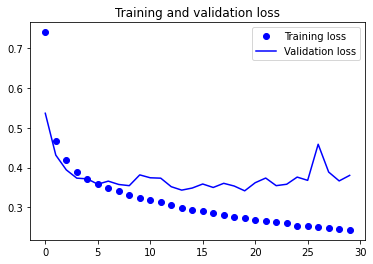

In [34]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()